<a href="https://colab.research.google.com/github/bisu617/MLPC-ko-lagi/blob/main/MLPC_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the necessary libraries**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay

import xgboost as xgb
from joblib import Parallel, delayed

In [51]:
# Loading flood prediction dataset from GitHub
df = pd.read_csv("https://raw.githubusercontent.com/bisu617/MLPC-ko-lagi/refs/heads/main/FloodPrediction.csv")
df.head()

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


In [52]:
#  3. Data Cleaning and Exploration
print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
df = df.dropna(subset=["Flood?"])

Missing values:
 Sl                       0
Station_Names            0
Year                     0
Month                    0
Max_Temp                 0
Min_Temp                 0
Rainfall                 0
Relative_Humidity        0
Wind_Speed               0
Cloud_Coverage           0
Bright_Sunshine          0
Station_Number           0
X_COR                    0
Y_COR                    0
LATITUDE                 0
LONGITUDE                0
ALT                      0
Period                   0
Flood?               16051
dtype: int64

Data types:
 Sl                     int64
Station_Names         object
Year                   int64
Month                  int64
Max_Temp             float64
Min_Temp             float64
Rainfall             float64
Relative_Humidity    float64
Wind_Speed           float64
Cloud_Coverage       float64
Bright_Sunshine      float64
Station_Number         int64
X_COR                float64
Y_COR                float64
LATITUDE             float64
LONGITUD

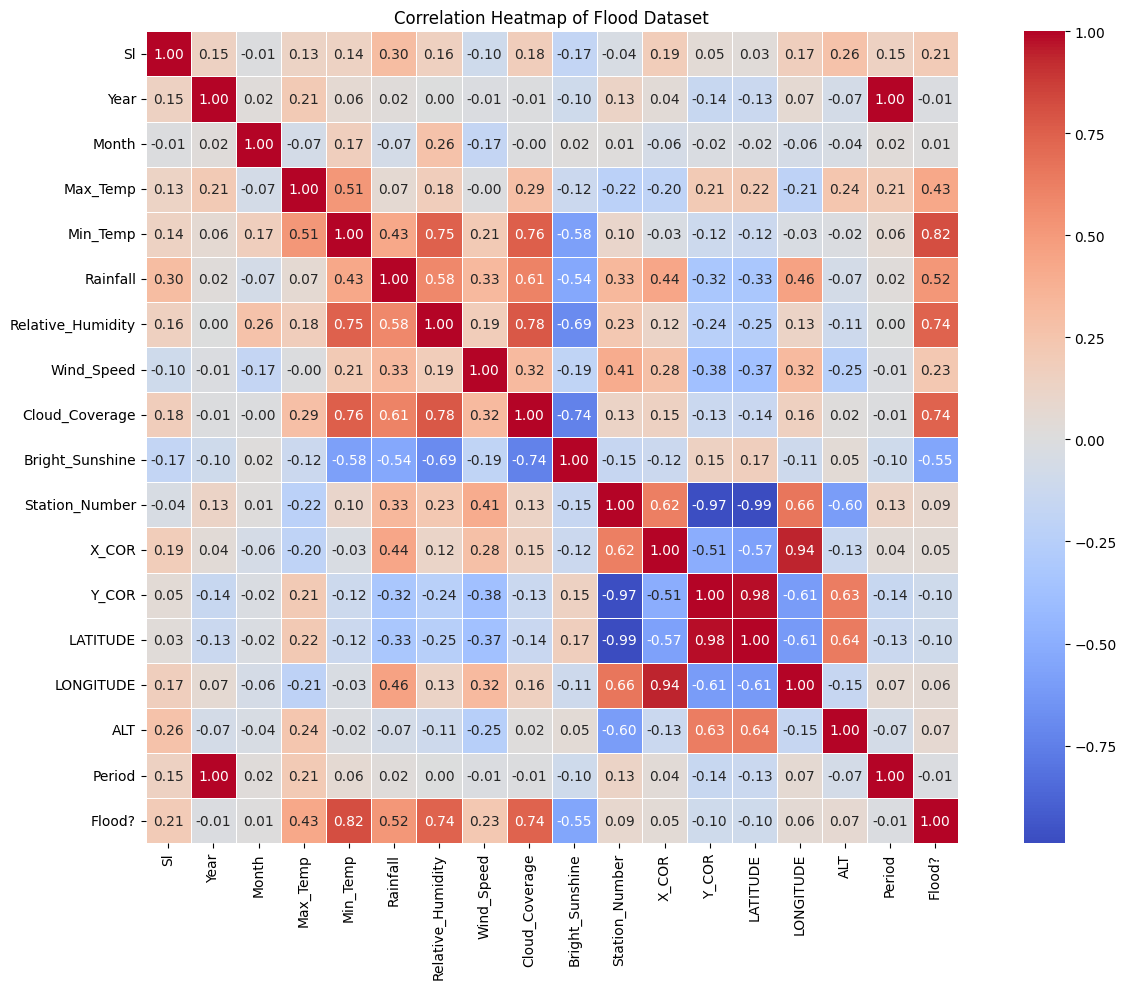

In [53]:
plt.figure(figsize=(14, 10))
# Exclude non-numeric columns before calculating correlation
sns.heatmap(df.drop('Station_Names', axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Flood Dataset")
plt.tight_layout()
plt.show()

In [54]:
#  5. Prepare Features and Target
X = df.drop(columns=["Flood?", "Station_Names", "Sl"])
y = df["Flood?"]

In [55]:
#  6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)


In [56]:
# 7. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
#  8. Train Linear Regression Model
start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_time = time.time() - start_time

In [58]:
#  9. Evaluate Linear Regression
lr_preds = lr_model.predict(X_test_scaled)
lr_r2 = r2_score(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_mae = mean_absolute_error(y_test, lr_preds)

In [59]:
print("\n Linear Regression Results:")
print(f"Training time: {lr_time:.4f} seconds")
print(f"R² Score: {lr_r2:.3f}")
print(f"RMSE: {lr_rmse:.3f}")
print(f"MAE: {lr_mae:.3f}")


 Linear Regression Results:
Training time: 0.0029 seconds
R² Score: 0.744
RMSE: 0.158
MAE: 0.089


In [60]:
# 10. Train Random Forest Regressor (Parallel)
start_time = time.time()
rf_model = RandomForestRegressor(n_estimators=20, max_depth=20, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
rf_time = time.time() - start_time

# 11. Evaluate Random Forest
rf_preds = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

In [61]:
# 📊 11. Evaluate Random Forest
rf_preds = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)


In [62]:
print("\n🔸 Random Forest Regressor Results (Parallel):")
print(f"Training time: {rf_time:.4f} seconds")
print(f"R² Score: {rf_r2:.3f}")
print(f"RMSE: {rf_rmse:.3f}")
print(f"MAE: {rf_mae:.3f}")


🔸 Random Forest Regressor Results (Parallel):
Training time: 0.2308 seconds
R² Score: 0.857
RMSE: 0.118
MAE: 0.020


In [63]:
#  12. Train XGBoost Models (CPU & GPU)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [64]:
params_cpu = {
    'objective': 'reg:squarederror',
    'max_depth': 10,
    'eta': 0.1,
    'nthread': -1,
    'verbosity': 0,
    'tree_method': 'hist'
}

params_gpu = {
    'objective': 'reg:squarederror',
    'max_depth': 10,
    'eta': 0.1,
    'verbosity': 0,
    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor'
}

start_time = time.time()
xgb_cpu = xgb.train(params_cpu, dtrain, num_boost_round=100)
cpu_time = time.time() - start_time
cpu_preds = xgb_cpu.predict(dtest)
cpu_mse = mean_squared_error(y_test, cpu_preds)
cpu_r2 = r2_score(y_test, cpu_preds)

start_time = time.time()
xgb_gpu = xgb.train(params_gpu, dtrain, num_boost_round=100)
gpu_time = time.time() - start_time
gpu_preds = xgb_gpu.predict(dtest)
gpu_mse = mean_squared_error(y_test, gpu_preds)
gpu_r2 = r2_score(y_test, gpu_preds)

print("\n🔸 XGBoost CPU Results:")
print(f"Training time: {cpu_time:.4f} seconds")
print(f"MSE: {cpu_mse:.5f}")
print(f"R2 Score: {cpu_r2:.5f}")

print("\n🔹 XGBoost GPU Results:")
print(f"Training time: {gpu_time:.4f} seconds")
print(f"MSE: {gpu_mse:.5f}")
print(f"R2 Score: {gpu_r2:.5f}")


🔸 XGBoost CPU Results:
Training time: 0.4428 seconds
MSE: 0.00009
R2 Score: 0.99911

🔹 XGBoost GPU Results:
Training time: 0.4082 seconds
MSE: 0.00008
R2 Score: 0.99918


In [65]:
#  13. Model Comparison Table
results_df = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost (CPU)", "XGBoost (GPU)"],
    "Parallelism": ["CPU (n_jobs=-1)", "CPU (nthread=-1)", "GPU"],
    "Training Time (s)": [rf_time, cpu_time, gpu_time],
    "MSE": [rf_mse, cpu_mse, gpu_mse],
    "R2 Score": [rf_r2, cpu_r2, gpu_r2]
})

print("\n Model Performance Summary:")
print(results_df.round(5))



 Model Performance Summary:
           Model       Parallelism  Training Time (s)      MSE  R2 Score
0  Random Forest   CPU (n_jobs=-1)            0.23081  0.01398   0.85725
1  XGBoost (CPU)  CPU (nthread=-1)            0.44283  0.00009   0.99911
2  XGBoost (GPU)               GPU            0.40824  0.00008   0.99918


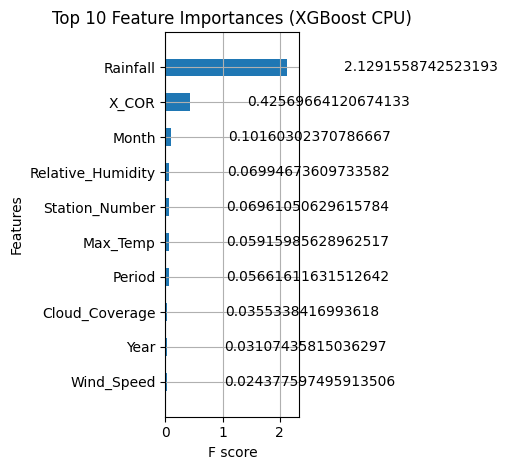

In [67]:
#  15. Feature Importance (XGBoost)
xgb.plot_importance(xgb_cpu, max_num_features=10, height=0.5, importance_type='gain')
plt.title("Top 10 Feature Importances (XGBoost CPU)")
plt.tight_layout()
plt.show()

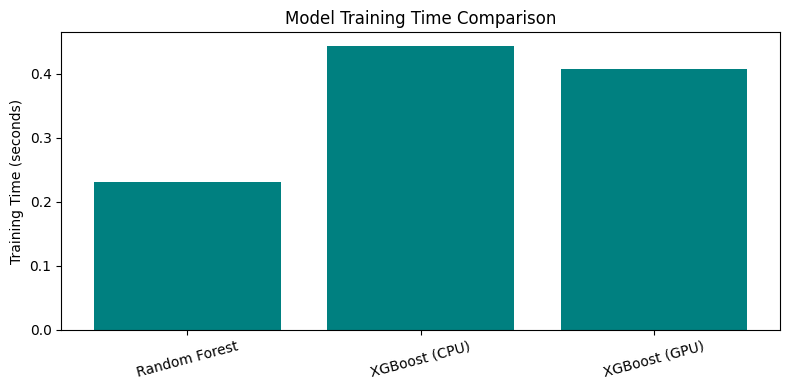

In [68]:
#  17. Training Time Bar Chart
plt.figure(figsize=(8, 4))
plt.bar(results_df["Model"], results_df["Training Time (s)"], color='teal')
plt.ylabel("Training Time (seconds)")
plt.title("Model Training Time Comparison")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

<Figure size 600x500 with 0 Axes>

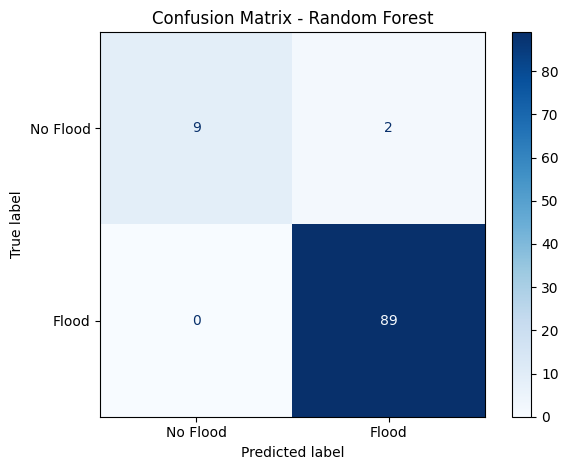

In [69]:
#  18. Confusion Matrix (Random Forest as classifier)
rf_preds_class = (rf_preds >= 0.5).astype(int)
cm = confusion_matrix(y_test, rf_preds_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Flood", "Flood"])
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.tight_layout()
plt.show()

R2 comparision between XGBoost CPU and GPU


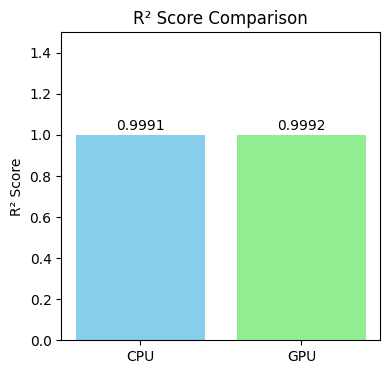

In [70]:
 #1. Bar plot for R² Score comparison
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.bar(['CPU', 'GPU'], [cpu_r2, gpu_r2], color=['skyblue', 'lightgreen'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1.5)
for i, v in enumerate([cpu_r2, gpu_r2]):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
